In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
data_noload = pd.read_csv('counts_nodedataload.csv')
data_noload

,level,num_qubits,swap_depth,cswap_depth,cswap_count,swap_count,h_count,x_count
0,3,18,9,15,22,13,8,22
1,4,35,11,25,58,23,13,58
2,5,68,13,35,134,41,22,134
3,6,133,15,45,290,75,39,290
4,7,262,17,55,606,141,72,606
5,8,519,19,65,1242,271,137,1242
6,9,1032,21,75,2518,529,266,2518
7,10,2057,23,85,5074,1043,523,5074
8,11,4106,25,95,10190,2069,1036,10190
9,12,8203,27,105,20426,4119,2061,20426


In [4]:
swap_tele = pd.read_csv('h_tree.csv')
swap_tele = swap_tele[:11]
swap_tele

,level,tele_count,swap_count,tele_depth,swap_depth
0,3,12,6.0,12,6.0
1,4,24,16.0,24,16.0
2,5,60,50.0,40,40.0
3,6,192,156.0,84,96.0
4,7,504,434.0,140,196.0
5,8,1216,1136.0,208,384.0
6,9,2808,2790.0,288,684.0
7,10,6320,6620.0,380,1200.0
8,11,13992,15202.0,484,1980.0
9,12,30624,34248.0,600,3264.0


In [5]:
data_load = pd.read_csv('counts_data.csv')[:11]
data_load

,level,num_qubits,swap_depth,cswap_depth,cswap_count,swap_count,h_count,x_count
0,3,18,10,18,28,14,5,28
1,4,35,12,28,72,24,6,72
2,5,68,14,38,164,42,7,164
3,6,133,16,48,352,76,8,352
4,7,262,18,58,732,142,9,732
5,8,519,20,68,1496,272,10,1496
6,9,1032,22,78,3028,530,11,3028
7,10,2057,24,88,6096,1044,12,6096
8,11,4106,26,98,12236,2070,13,12236
9,12,8203,28,108,24520,4120,14,24520


In [6]:
raw_cz = 22*data_load.cswap_count+swap_tele.swap_count*3 + data_load.swap_count*3
raw_czdepth = 22*data_load.cswap_depth+swap_tele.swap_depth*3 + data_load.swap_depth*3
tele_cz = 22*data_load.cswap_count+swap_tele.tele_count + data_load.swap_count*3
tele_czdepth = 22*data_load.cswap_depth+swap_tele.tele_depth + data_load.swap_depth*3
noload_cz = 22*data_noload.cswap_count+ swap_tele.tele_count + data_noload.swap_count*3
noload_czdepth = 22*data_noload.cswap_depth+ swap_tele.tele_depth + data_noload.swap_depth*3
subspace_cz = 12*data_noload.cswap_count+ swap_tele.tele_count + data_noload.swap_count*3
subspace_czdepth = 12*data_noload.cswap_depth+ swap_tele.tele_depth + data_noload.swap_depth*3


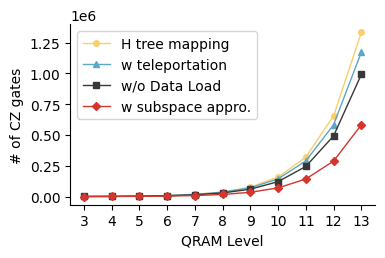

In [8]:

## plot the data
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
scale = 1
width = 252/64*scale    
# height of figure in inc
height = 150/64*scale
plt.rcParams['figure.figsize'] = (width, height)
plt.rcParams['font.size'] = 10*scale
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.6
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = scale
## read the data

colors = ['#FBCE6A','#5CA7C7','#383838','#D4352D']
# hatchs = ['xxxx','','','+','//']
x = data_load.level
markersize = 4
ax.plot(x, raw_cz, label='H tree mapping', marker='o', markersize=markersize, color=colors[0], linestyle='-')
ax.plot(x, tele_cz, label='w teleportation', marker='^', markersize= markersize, color=colors[1], linestyle='-')
ax.plot(x, noload_cz, label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.plot(x, subspace_cz, label='w subspace appro.', marker='D', markersize=markersize, color=colors[3], linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('QRAM Level')
ax.set_ylabel('# of CZ gates')
ax.set_xticks(x)
ax.set_xticklabels(x)
# ax.set_yscale('log')
ax.legend(loc='upper left')
## hidden the top and right spines

plt.savefig('cz_gates_vs_qram_level.svg', bbox_inches='tight')

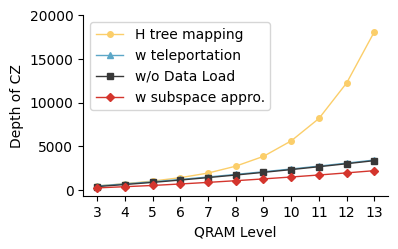

In [10]:
fig, ax = plt.subplots()
scale = 1
width = 252/64*scale    
# height of figure in inc
height = 150/64*scale
plt.rcParams['figure.figsize'] = (width, height)
plt.rcParams['font.size'] = 10*scale
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
## set hatch density
plt.rcParams['hatch.linewidth'] = 0.6
plt.rcParams['hatch.color'] = 'black'
plt.rcParams['lines.linewidth'] = scale
ax.plot(x, raw_czdepth, label='H tree mapping', marker='o', markersize=markersize, color=colors[0], linestyle='-')
ax.plot(x, tele_czdepth, label='w teleportation', marker='^', markersize= markersize, color=colors[1], linestyle='-')
ax.plot(x, noload_czdepth,label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.plot(x, subspace_czdepth, label='w subspace appro.', marker='D', markersize=markersize, color=colors[3], linestyle='-')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('QRAM Level')
ax.set_ylabel('Depth of CZ')
ax.set_xticks(x)
ax.set_xticklabels(x)
# ax.set_xlim(2.5,10.5)
ax.set_yticks(np.array([0,5,10,15,20])*1e3)
# ax.set_yscale('log')
ax.legend(loc='upper left')
plt.savefig('cz_gate_depth_vs_qram_level.svg', bbox_inches='tight')